In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# import the torch packages
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset

import torchvision.models as models

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# import custom functions
from helper_functions import *
from latency_helpers import *
from loading_functions import *

from Torch_Models import *

from file_paths import *

from nn_functions import runkfoldcv
# from torchsummary import summary

In [9]:
feat_folder = '../Features/'
feat_name = 'RAW' # 'PSD' or 'SPEC' or RAW (Iq or volt)
t_seg = 20
n_per_seg = 1024

output_name = 'bi'
feat_format = 'ARR'# ARR, IMG
which_dataset = 'dronerf'
output_tensor = True

# dataset specific parameters
drrf_highlow = 'L' # DroneRF high or low frequency
drde_ints = ['WIFI','CLEAN','BLUE','BOTH'] # DroneDetect which interferences

# if feat_format == 'RAW':
#     print ('Loading RAW '+ which_dataset +' data')
#     if which_dataset == 'dronerf':
#         dataset = RFRawTorch(dronerf_raw_path, t_seg, output_name, which_dataset, 
#                              downsamp=10000, interferences=None)
#     elif which_dataset == 'dronedetect':
#         dataset = DroneDetectTorch(dronedetect_feat_path, feat_name, t_seg, n_per_seg, feat_format,
#                                         output_name, output_tensor, drde_ints)
# else:
if which_dataset == 'dronerf':
    print('Loading DroneRF Dataset')
    dataset = DroneRFTorch(dronerf_feat_path, feat_name, t_seg, n_per_seg,
                       feat_format, output_name, output_tensor, drrf_highlow)
elif which_dataset == 'dronedetect':
    print('Loading DroneDetect Dataset')
    dataset = DroneDetectTorch(dronedetect_feat_path, feat_name, t_seg, n_per_seg, feat_format,
                                    output_name, output_tensor, drde_ints)

Loading DroneRF Dataset
/home/kzhou/main/Features_DroneRF/ARR_RAW_10000_20/
dataset size 2712
shape of each item torch.Size([2, 10000])


In [10]:
dataset.__getitem__(40)

(tensor([[0.7683, 0.5126, 0.6396,  ..., 0.5996, 0.5542, 0.5122],
         [0.6198, 0.6201, 0.6199,  ..., 0.6205, 0.6199, 0.6197]]),
 1)

In [11]:
dataset.fi_lens

array([ 113,  226,  339,  452,  565,  678,  791,  904, 1017, 1130, 1243,
       1356, 1469, 1582, 1695, 1808, 1921, 2034, 2147, 2260, 2373, 2486,
       2599, 2712])

In [12]:
num_classes = len(dataset.unique_labels)
which_model = '1dconv' # or 'resnet'
if which_model == 'vgg':
    Model = VGGFC(num_classes)
elif which_model == 'resnet':
    Model = ResNetFC(num_classes)
elif which_model == '1dconv':
    Model = RFUAVNet(num_classes)

In [13]:
test_samp = dataset.__getitem__(40)[0]
test_samp = torch.unsqueeze(test_samp, 0)
Model(test_samp)

tensor([[1.0784, 0.3251]], grad_fn=<AddmmBackward0>)

In [16]:
# Configuration options
k_folds = 5

batch_size = 128 # 128
learning_rate = 0.01
num_epochs = 50 # 0
momentum = 0.95
l2reg = 1e-4

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

--------------------------------
FOLD 0
--------------------------------
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting testing
----------------
Ac

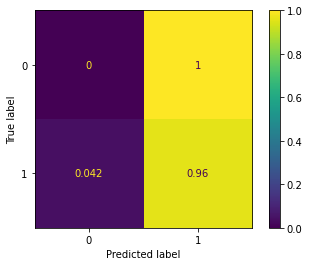

FOLD 1
--------------------------------
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting testing
----------------
Accuracy for fold 1: 81.584 %
F1 fo

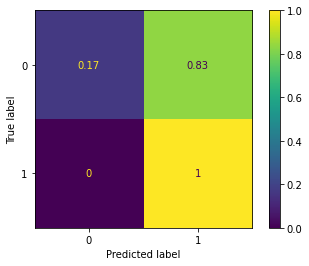

FOLD 2
--------------------------------
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting testing
----------------
Accuracy for fold 2: 84.871 %
F1 fo

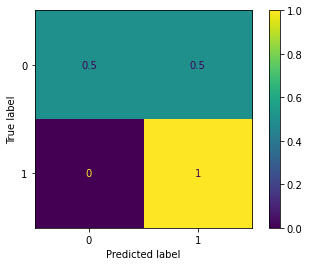

FOLD 3
--------------------------------
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting testing
----------------
Accuracy for fold 3: 88.007 %
F1 fo

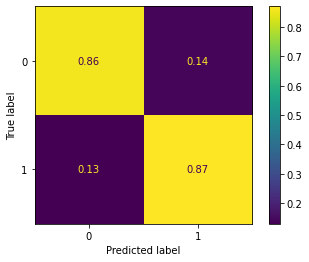

FOLD 4
--------------------------------
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting testing
----------------
Accuracy for fold 4: 85.793 %
F1 fo

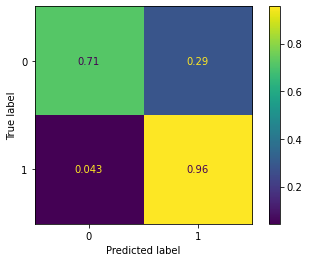

K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 81.58379373848987 %
Fold 1: 81.58379373848987 %
Fold 2: 84.87084870848709 %
Fold 3: 88.00738007380073 %
Fold 4: 85.79335793357934 %
Average Accuracy: 84.36783483856938 %
Average F1: 0.9082919977793015
Average Runtime: 1.1236408219153051 ms


In [17]:
trainedModel, res_acc, res_f1, res_runtime = runkfoldcv(Model, dataset, device, k_folds, batch_size, learning_rate, num_epochs, momentum, l2reg)